## Recogemos los vuelos para SAN VALENTIN del 13/02/2025 al 16/02/2025

In [55]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import os

### Obtenemos informacion de la API

### para madrid

In [24]:
# url = "https://sky-scrapper.p.rapidapi.com/api/v2/flights/searchFlights"

# querystring = {"originSkyId":"MAD","destinationSkyId":"PARI","originEntityId":"95565077","destinationEntityId":"27539733","date":"2025-02-13","returnDate":"2025-02-16","cabinClass":"economy","adults":"2","sortBy":"best","limit":"15","currency":"EUR","market":"es-ES","countryCode":"US"}

# headers = {
# 	"x-rapidapi-key": "cfc9392482msha77523679c79d2fp1a7c8djsn5e2f26bf1091",
# 	"x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# with open('datos/jsons/respuestas/', 'w') as file:
#     json.dump(response.json(), 'vuelo_madrid_paris_2025.json', indent=4)# indent es para el formato al guardarlo

### para barcelona

In [56]:

url = "https://sky-scrapper.p.rapidapi.com/api/v2/flights/searchFlights"

querystring = {"originSkyId":"MAD","destinationSkyId":"BCN","originEntityId":"95565077","destinationEntityId":"95565085","date":"2025-02-13","returnDate":"2025-02-16","cabinClass":"economy","adults":"2","sortBy":"best","limit":"15","currency":"EUR","market":"es-es","countryCode":"ES"}

headers = {
	"x-rapidapi-key": "cfc9392482msha77523679c79d2fp1a7c8djsn5e2f26bf1091",
	"x-rapidapi-host": "sky-scrapper.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

file_path = os.path.join('datos/jsons/respuestas/', 'vuelo_madrid_barcelona_2025.json')

with open(file_path, 'w') as file:
    json.dump(response.json(), file, indent=4)

### Leemos la respuesta que nos hemos guardado de la API de vuelos

In [42]:

data = pd.read_json('datos/jsons/respuestas/vuelo_madrid_paris_2025.json')

# Extraemos los itinerarios
itineraries = data['data']['itineraries']

# Creamos una lista con los datos clave
flight_data = []
for itinerary in itineraries:
    price = itinerary['price']['raw']
    leg_1 = itinerary['legs'][0]
    leg_2 = itinerary['legs'][1]
    
    flight_info = {
        'id': itinerary['id'],
        'price': price,
        'departure_1': leg_1['departure'],
        'arrival_1': leg_1['arrival'],
        'duration_1': leg_1['durationInMinutes'],
        'origin_1': leg_1['origin']['name'],
        'destination_1': leg_1['destination']['name'],
        'departure_2': leg_2['departure'],
        'arrival_2': leg_2['arrival'],
        'duration_2': leg_2['durationInMinutes'],
        'origin_2': leg_2['origin']['name'],
        'destination_2': leg_2['destination']['name']
    }
    
    flight_data.append(flight_info)

df = pd.DataFrame(flight_data)

# Generamos nombres de los vuelos (ORIGEN / DESTINO)
def generate_flight_name(row):
    origin_1 = row['origin_1']
    destination_1 = row['destination_1']
    origin_2 = row['origin_2']
    destination_2 = row['destination_2']
    return f"{origin_1} -> {destination_1} / {origin_2} -> {destination_2}"


df['flight_name'] = df.apply(generate_flight_name, axis=1)

# Ordenamos por precio
df_sorted_by_price = df.sort_values(by='price', ascending=False)

# Ordenamos por duración total
df['total_duration'] = df['duration_1'] + df['duration_2']
df_sorted_by_duration = df.sort_values(by='total_duration', ascending=False)




In [48]:
df_sorted_by_duration.head()

,id,price,departure_1,arrival_1,duration_1,origin_1,destination_1,departure_2,arrival_2,duration_2,origin_2,destination_2,flight_name,total_duration
8,13870-2502130750--31915-0-10223-2502131000|150...,299.94,2025-02-13T07:50:00,2025-02-13T10:00:00,130,Madrid,Paris Beauvais,2025-02-16T06:30:00,2025-02-17T00:10:00,1060,Paris Orly,Madrid,Madrid -> Paris Beauvais / Paris Orly -> Madrid,1190
5,13870-2502132005--32356-0-10413-2502132215|104...,310.70,2025-02-13T20:05:00,2025-02-13T22:15:00,130,Madrid,Paris Charles de Gaulle,2025-02-16T07:30:00,2025-02-17T00:10:00,1000,Paris Charles de Gaulle,Madrid,Madrid -> Paris Charles de Gaulle / Paris Char...,1130
6,13870-2502130750--31915-0-10223-2502131000|104...,294.70,2025-02-13T07:50:00,2025-02-13T10:00:00,130,Madrid,Paris Beauvais,2025-02-16T07:30:00,2025-02-17T00:10:00,1000,Paris Charles de Gaulle,Madrid,Madrid -> Paris Beauvais / Paris Charles de Ga...,1130
9,13870-2502131825--31915-0-10223-2502132035|104...,296.26,2025-02-13T18:25:00,2025-02-13T20:35:00,130,Madrid,Paris Beauvais,2025-02-16T07:30:00,2025-02-17T00:10:00,1000,Paris Charles de Gaulle,Madrid,Madrid -> Paris Beauvais / Paris Charles de Ga...,1130
7,13870-2502132235--31685-1-15083-2502140825|150...,422.58,2025-02-13T22:35:00,2025-02-14T08:25:00,590,Madrid,Paris Orly,2025-02-16T16:40:00,2025-02-17T00:10:00,450,Paris Orly,Madrid,Madrid -> Paris Orly / Paris Orly -> Madrid,1040


In [47]:
df_sorted_by_duration.head()

,id,price,departure_1,arrival_1,duration_1,origin_1,destination_1,departure_2,arrival_2,duration_2,origin_2,destination_2,flight_name,total_duration
8,13870-2502130750--31915-0-10223-2502131000|150...,299.94,2025-02-13T07:50:00,2025-02-13T10:00:00,130,Madrid,Paris Beauvais,2025-02-16T06:30:00,2025-02-17T00:10:00,1060,Paris Orly,Madrid,Madrid -> Paris Beauvais / Paris Orly -> Madrid,1190
5,13870-2502132005--32356-0-10413-2502132215|104...,310.70,2025-02-13T20:05:00,2025-02-13T22:15:00,130,Madrid,Paris Charles de Gaulle,2025-02-16T07:30:00,2025-02-17T00:10:00,1000,Paris Charles de Gaulle,Madrid,Madrid -> Paris Charles de Gaulle / Paris Char...,1130
6,13870-2502130750--31915-0-10223-2502131000|104...,294.70,2025-02-13T07:50:00,2025-02-13T10:00:00,130,Madrid,Paris Beauvais,2025-02-16T07:30:00,2025-02-17T00:10:00,1000,Paris Charles de Gaulle,Madrid,Madrid -> Paris Beauvais / Paris Charles de Ga...,1130
9,13870-2502131825--31915-0-10223-2502132035|104...,296.26,2025-02-13T18:25:00,2025-02-13T20:35:00,130,Madrid,Paris Beauvais,2025-02-16T07:30:00,2025-02-17T00:10:00,1000,Paris Charles de Gaulle,Madrid,Madrid -> Paris Beauvais / Paris Charles de Ga...,1130
7,13870-2502132235--31685-1-15083-2502140825|150...,422.58,2025-02-13T22:35:00,2025-02-14T08:25:00,590,Madrid,Paris Orly,2025-02-16T16:40:00,2025-02-17T00:10:00,450,Paris Orly,Madrid,Madrid -> Paris Orly / Paris Orly -> Madrid,1040


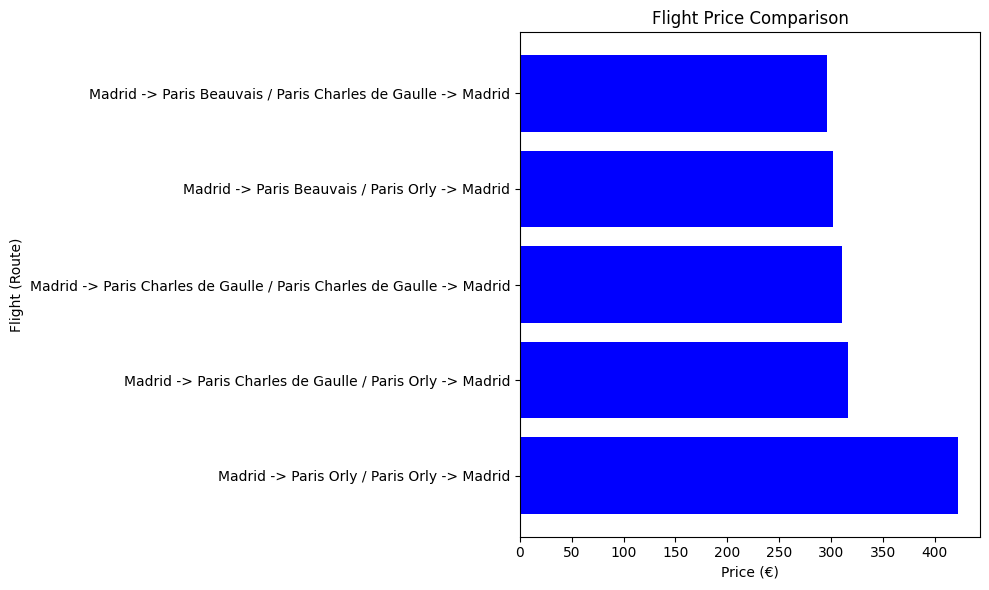

In [44]:

plt.figure(figsize=(10, 6))
plt.barh(df_sorted_by_price['flight_name'], df_sorted_by_price['price'], color='blue')
plt.xlabel('Price (€)')
plt.ylabel('Flight (Route)')
plt.title('Flight Price Comparison')
plt.tight_layout()
plt.show()


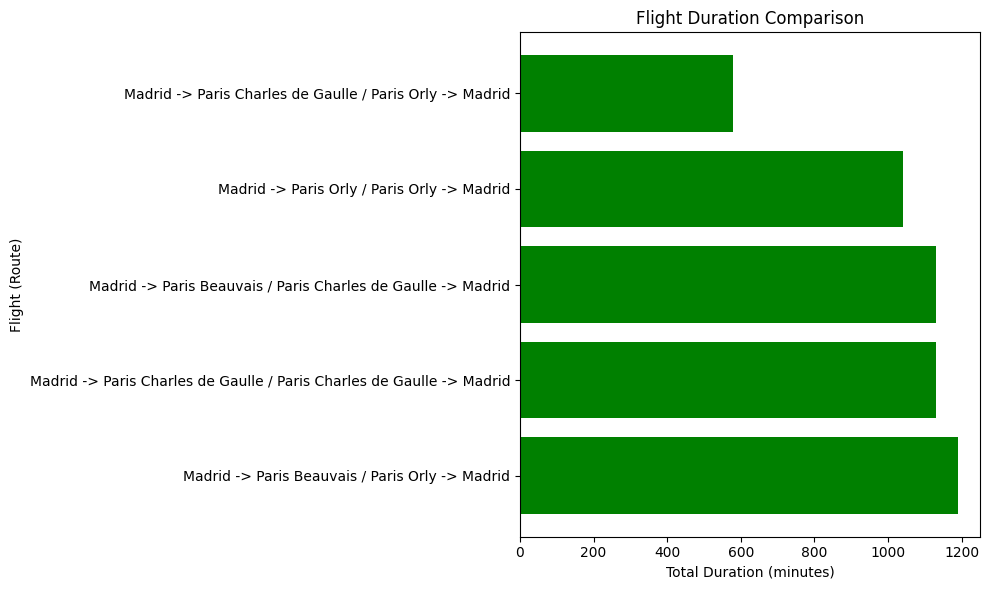

In [45]:

plt.figure(figsize=(10, 6))
plt.barh(df_sorted_by_duration['flight_name'], df_sorted_by_duration['total_duration'], color='green')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Flight (Route)')
plt.title('Flight Duration Comparison')
plt.tight_layout()
plt.show()


## Grafica Doble

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(78, 66))

# Gráfico 1: Duración Total de los Vuelos
ax1.bar(df['flight_name'], df['total_duration'], color='orange')
ax1.set_ylabel('Duración Total (minutos)', fontsize=60)
ax1.set_xlabel('Vuelos (Ruta)', fontsize=60)
ax1.set_title('Duración Total de los Vuelos', fontsize=60)
ax1.tick_params(axis='x', rotation=80, labelsize=50)
ax1.tick_params(axis='y', labelsize=50)
ax1.grid(True)

# Gráfico 2: Precio de los Vuelos
ax2.bar(df['flight_name'], df['price'], color='purple')
ax2.set_ylabel('Precio (€)', fontsize=60)
ax2.set_xlabel('Vuelos (Ruta)', fontsize=60)
ax2.set_title('Precio de los Vuelos', fontsize=60)
ax2.tick_params(axis='x', rotation=80, labelsize=50)
ax2.tick_params(axis='y', labelsize=50) 
ax2.grid(True)

plt.tight_layout()
plt.show()

### Esta sería la mejor opción. Con un precio de 315.94€ y una duracion total de 580 min (9h 40min)

In [53]:
df_sorted_by_duration.tail(1)

,id,price,departure_1,arrival_1,duration_1,origin_1,destination_1,departure_2,arrival_2,duration_2,origin_2,destination_2,flight_name,total_duration
2,13870-2502132005--32356-0-10413-2502132215|150...,315.94,2025-02-13T20:05:00,2025-02-13T22:15:00,130,Madrid,Paris Charles de Gaulle,2025-02-16T16:40:00,2025-02-17T00:10:00,450,Paris Orly,Madrid,Madrid -> Paris Charles de Gaulle / Paris Orly...,580
